In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
dataset=sns.load_dataset('iris')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [17]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
X=dataset.iloc[:,0:4]
Y=dataset.iloc[:,-1]

In [19]:
label_encoder=preprocessing.LabelEncoder()
dataset['species']=label_encoder.fit_transform(dataset['species'])

neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y)
# KNeighborsClassifier
print(neigh.predict([[4.9,3.0,1.4,0.2]]))

['setosa']


C:\Users\shikh\anaconda3\New folder\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
X_train, X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=15)

In [21]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
58,6.6,2.9,4.6,1.3
130,7.4,2.8,6.1,1.9
13,4.3,3.0,1.1,0.1
11,4.8,3.4,1.6,0.2
...,...,...,...,...
85,6.0,3.4,4.5,1.6
128,6.4,2.8,5.6,2.1
119,6.0,2.2,5.0,1.5
133,6.3,2.8,5.1,1.5


In [25]:
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    acc=accuracy_score(Y_test, Y_pred , normalize=True)*float(100)
    print('\n accuracy for k =%d is %d ',(i,acc))
    # Accuracy will increase as value of k increases till some threshold value and after that there is sudden drop in accuracy.


 accuracy for k =%d is %d  (1, 97.36842105263158)

 accuracy for k =%d is %d  (3, 97.36842105263158)

 accuracy for k =%d is %d  (5, 97.36842105263158)

 accuracy for k =%d is %d  (7, 97.36842105263158)

 accuracy for k =%d is %d  (9, 100.0)

 accuracy for k =%d is %d  (11, 100.0)

 accuracy for k =%d is %d  (13, 100.0)

 accuracy for k =%d is %d  (15, 100.0)

 accuracy for k =%d is %d  (17, 100.0)

 accuracy for k =%d is %d  (19, 100.0)

 accuracy for k =%d is %d  (21, 100.0)

 accuracy for k =%d is %d  (23, 97.36842105263158)

 accuracy for k =%d is %d  (25, 100.0)

 accuracy for k =%d is %d  (27, 97.36842105263158)

 accuracy for k =%d is %d  (29, 97.36842105263158)


# Finding the optimal value of K where accuracy is high

The optimal neighbors is 11


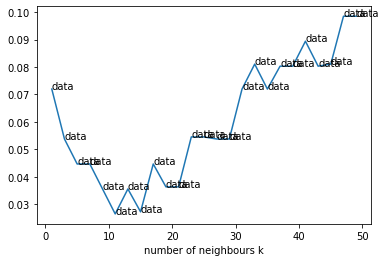

In [29]:
mylist =list(range(0,50))
neighbors=list(filter(lambda x:x%2!=0, mylist))
cv_scores=[]
for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
mse=[1-x for x in cv_scores]
optimal_k=neighbors[mse.index(min(mse))]
print('The optimal neighbors is', optimal_k)
plt.plot(neighbors,mse)
for xyy in zip(neighbors,mse):
    plt.annotate(xy=xyy,text='data')
    plt.xlabel('number of neighbours k')


# Finding accuracy for optimal value of k 

In [35]:
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train,Y_train)
pred=knn_optimal.predict(X_test)
acc=accuracy_score(Y_test,pred)*100
print('accuracy of knn classifier for k={%d} is{ %f}',optimal_k,acc)

accuracy of knn classifier for k={%d} is{ %f} 11 100.0
